In [33]:
# Causal Inference
import dowhy.gcm as gcm
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dowhy.gcm.falsify import FalsifyConst, falsify_graph, plot_local_insights, run_validations, apply_suggestions
# Graph drawing
import networkx as nx

In [34]:
data = pd.read_csv('12hour.csv', na_values='*')
biomrkrs = pd.read_csv('./biomarker_attr.csv')
labs = biomrkrs.Biomarker.to_list()
labs.append('Neurologic Morbidity')
labs.append('Age')
data.columns = labs
# data = data.fillna(data.mean())
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(data)
data = pd.DataFrame(imputed_data, columns=data.columns)
data.head()

,Base deficit,Base excess,Bicarbonate,Blood urea nitrogen,Chloride,Cisatracurium,C-Reactive Protein,Creatinine,CRRT Therapy Type,DBP,...,SBP,Sodium,SpO2,Temperature,Ventilated,Ventilator Make/Model,Weight,White blood cell count,Neurologic Morbidity,Age
0,-4.943186,-0.096646,23.000000,7.000000,-0.000756,0.0,-0.001602,-50.000000,0.0,11.0,...,0.019171,2.000000,97.0,1.0,0.0,-1.0,-2.240879,10.314454,0.0,1.0
1,-5.589399,-0.113173,22.468451,12.929177,-0.000925,0.0,-0.000172,-0.165260,0.0,28.0,...,0.006519,0.000000,97.0,1.6,0.0,-1.0,5.245110,19.300000,0.0,12.0
2,5.628605,4.000000,34.500000,17.370789,-0.001303,0.0,-0.000780,7.621208,0.0,22.0,...,0.013454,1.000000,97.0,0.6,1.0,0.0,31.358715,12.600000,0.0,12.0
3,-8.580055,-0.592178,18.000000,20.064206,-0.001451,0.0,0.001393,-3.778499,0.0,42.0,...,1.999583,0.000000,96.0,0.2,0.0,-1.0,46.977755,10.800000,1.0,144.0
4,-1.675923,0.092489,24.763673,11.545403,-0.001232,0.0,-0.001497,-0.405350,0.0,25.0,...,0.016188,1.142838,98.0,0.4,1.0,1.0,2.114946,8.929875,0.0,12.0


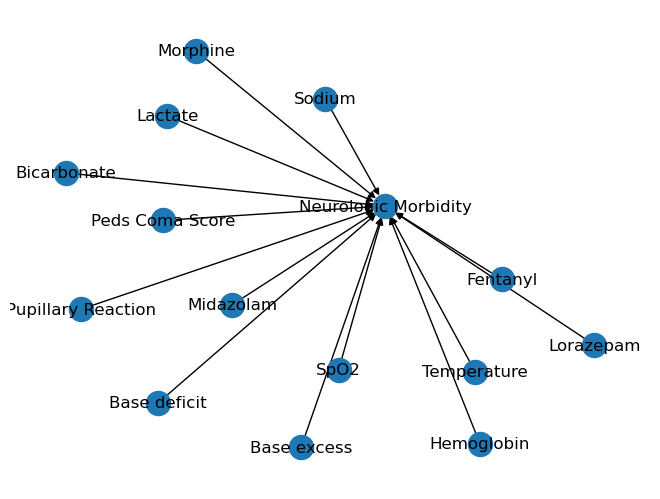

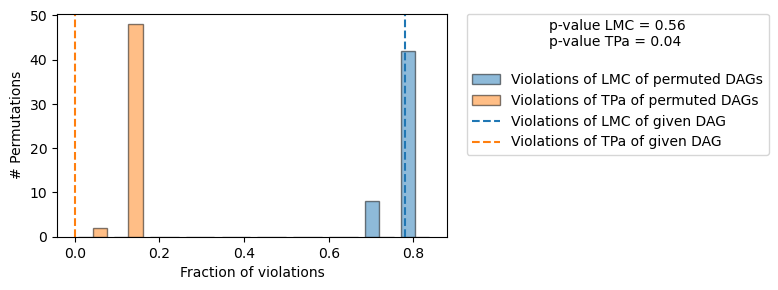

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [35]:
# Draw and build a graph using a string
graph = nx.DiGraph(
    [
        ("Base excess", "Neurologic Morbidity"),
        ("Base deficit", "Neurologic Morbidity"),
        ("Bicarbonate", "Neurologic Morbidity"),
        ("Fentanyl", "Neurologic Morbidity"),
        ("Hemoglobin", "Neurologic Morbidity"),
        ("Lactate", "Neurologic Morbidity"),
        ("Lorazepam", "Neurologic Morbidity"),
        ("Midazolam", "Neurologic Morbidity"),
        ("Morphine", "Neurologic Morbidity"),
        ("Peds Coma Score", "Neurologic Morbidity"),
        ("Pupillary Reaction", "Neurologic Morbidity"),
        ("Sodium", "Neurologic Morbidity"),
        ("SpO2", "Neurologic Morbidity"),
        ("Temperature", "Neurologic Morbidity"),
    ]
)

# Draw the graph
plt.figure()
nx.draw(graph, with_labels=True)
plt.show()

causal_model = gcm.StructuralCausalModel(graph)
summary_auto_assignment = gcm.auto.assign_causal_mechanisms(causal_model, data)
gcm.fit(causal_model, data)
summary_evaluation = gcm.evaluate_causal_model(causal_model, data, compare_mechanism_baselines=True)
print(summary_evaluation)

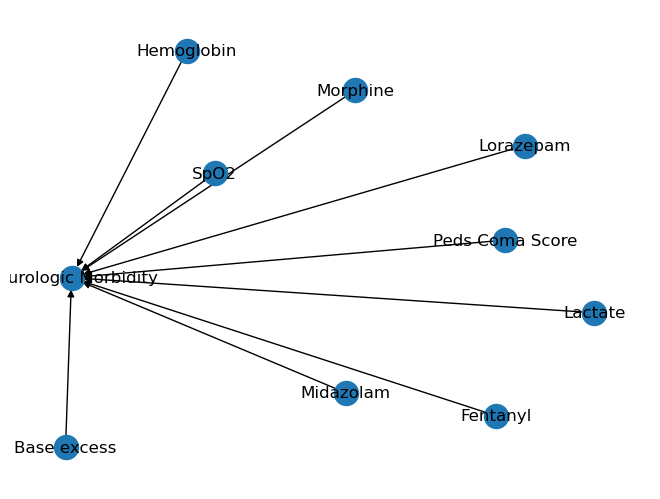

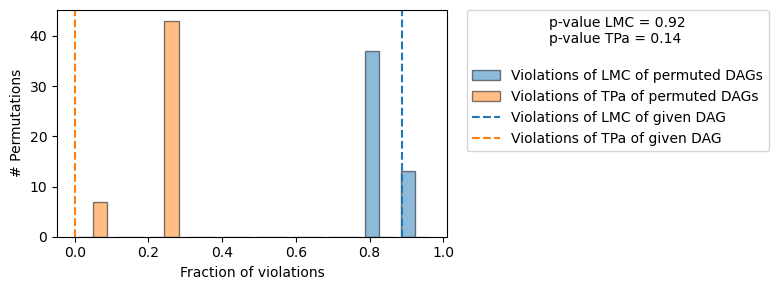

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [36]:
# Draw and build a graph using a string
graph = nx.DiGraph(
    [
        ("Base excess", "Neurologic Morbidity"),
        ("Fentanyl", "Neurologic Morbidity"),
        ("Hemoglobin", "Neurologic Morbidity"),
        ("Lactate", "Neurologic Morbidity"),
        ("Lorazepam", "Neurologic Morbidity"),
        ("Midazolam", "Neurologic Morbidity"),
        ("Morphine", "Neurologic Morbidity"),
        ("Peds Coma Score", "Neurologic Morbidity"),
        ("SpO2", "Neurologic Morbidity")
    ]
)

# Draw the graph
plt.figure()
nx.draw(graph, with_labels=True)
plt.show()

causal_model2 = gcm.StructuralCausalModel(graph)
summary_auto_assignment = gcm.auto.assign_causal_mechanisms(causal_model2, data)
gcm.fit(causal_model2, data)
summary_evaluation = gcm.evaluate_causal_model(causal_model2, data, compare_mechanism_baselines=True)
print(summary_evaluation)

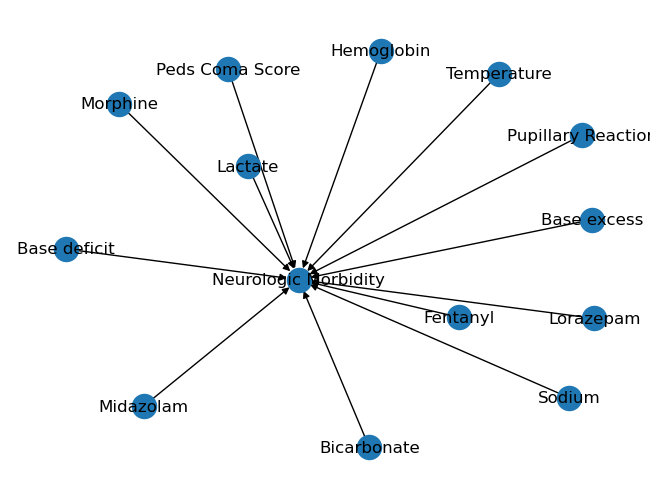

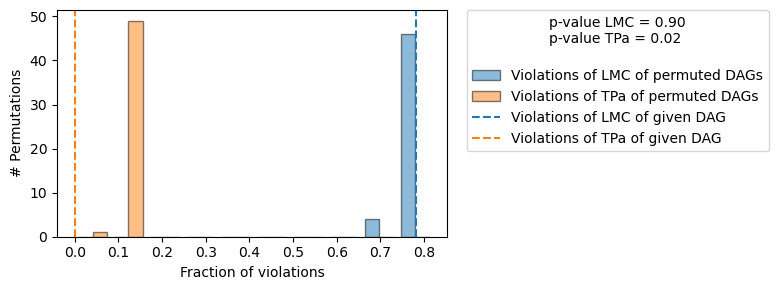

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [37]:
# Draw and build a graph using a string
graph = nx.DiGraph(
    [
        ("Base excess", "Neurologic Morbidity"),
        ("Base deficit", "Neurologic Morbidity"),
        ("Bicarbonate", "Neurologic Morbidity"),
        ("Fentanyl", "Neurologic Morbidity"),
        ("Hemoglobin", "Neurologic Morbidity"),
        ("Lactate", "Neurologic Morbidity"),
        ("Lorazepam", "Neurologic Morbidity"),
        ("Midazolam", "Neurologic Morbidity"),
        ("Morphine", "Neurologic Morbidity"),
        ("Peds Coma Score", "Neurologic Morbidity"),
        ("Pupillary Reaction", "Neurologic Morbidity"),
        ("Sodium", "Neurologic Morbidity"),
        ("Temperature", "Neurologic Morbidity"),
    ]
)

# Draw the graph
plt.figure()
nx.draw(graph, with_labels=True)
plt.show()


causal_model3 = gcm.StructuralCausalModel(graph)
summary_auto_assignment = gcm.auto.assign_causal_mechanisms(causal_model3, data)
gcm.fit(causal_model3, data)
summary_evaluation = gcm.evaluate_causal_model(causal_model3, data, compare_mechanism_baselines=True)
print(summary_evaluation)